#### Normalized Cuts and Image Segmentation
# Séparation de deux gaussiennes 

(première lecture de l'article)

## Construction de graphes (sans images pour le moment)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Génération de deux ensembles de points (à partir de gaussiennes) à segmenter

In [2]:
mean1 = (-1.5, 0.5)
mean2 = (1.5, 0.5)
cov1 = [[2, 0], [0, 4]]
cov2 = [[1, 0], [0, 2]]
nb = 400
V1 = np.random.multivariate_normal(mean1, cov1, nb)
V2 = np.random.multivariate_normal(mean2, cov2, nb)

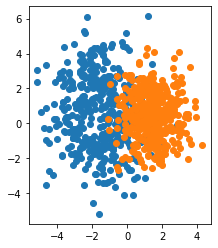

In [3]:
plt.scatter(V1[:, 0], V1[:, 1])
plt.scatter(V2[:, 0], V2[:, 1])
ax = plt.gca()  # pour obtenir l'objet 'ax' courant
ax.set_aspect("equal")  # cela ne peut se faire que sur l'axe
plt.show()

Fusionnons ces deux ensembles (sinon c'est très simple de les séparer)

In [4]:
V = np.concatenate([V1, V2])

### Création de la matrice de poids

Création de la matrice des poids, choisis comme étant inversement proportionnels à la distance entre deux points.

On utilise pour cela la fonction `pdist` de `scipy.spatial.distance` qui calcule les distances paire à paire. Le résultat est une forme condensée de la matrice (uniquement les coefficients diagonaux supérieurs, pour éviter la redonance) : on utilise alors la fonction `squareform` pour récupérer la matrice carrée diagonale associée.

In [5]:
import scipy.spatial.distance

In [6]:
W_cond = scipy.spatial.distance.pdist(V)
W = scipy.spatial.distance.squareform(W_cond)
W = np.divide(1, W, out=np.zeros_like(W), where=W != 0)  # les termes diagonaux valent 0

## Algorithme de séparation

### Création de la matrice D

$D$ est une matrice diagonale avec pour coefficients : $d(i, i) = \sum_j w(i, j)$

In [7]:
d = np.sum(W, axis=0)
D = np.diag(d)

### Résolution du problème aux valeurs propres

In [8]:
import scipy.linalg

On calcule `D_tmp` $= D^{-1/2}$ qui s'écrit comme suit, étant donné que $D$ est diagonale :

In [9]:
D_tmp = np.diag(d ** (-0.5))

On note $M$ la matrice intermédiaire dont on cherche à résoudre le problème aux valeurs propres

In [10]:
M = D_tmp.dot(D - W).dot(D_tmp)
(eigen_values, eigen_vectors) = scipy.linalg.eig(M)

Les valeurs propres ne sont pas ordonnées :'( 

On ordonne de la plus faible à la plus grande

In [11]:
idx = (-eigen_values).argsort()[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx]

## Construction de $x$

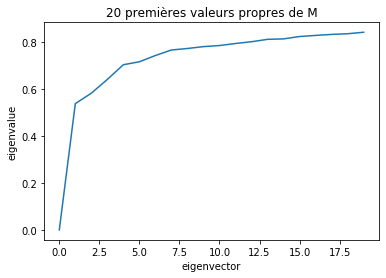

In [12]:
plt.plot(np.real(eigen_values)[:20])
plt.title("20 premières valeurs propres de M")
plt.xlabel("eigenvector")
plt.ylabel("eigenvalue")
plt.show()

In [13]:
x_temp = eigen_vectors[:, 1]

### Solution 1 : 0 comme séparateur

In [14]:
x = np.where(x_temp < 0, -1, 1)

## Création de A et B

In [15]:
A = V[np.where(x < 0)[0]]
B = V[np.where(x > 0)[0]]

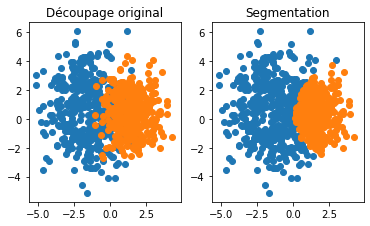

In [16]:
plt.figure()

plt.subplot(1, 2, 1)
plt.scatter(V1[:, 0], V1[:, 1])
plt.scatter(V2[:, 0], V2[:, 1])
ax = plt.gca()  # pour obtenir l'objet 'ax' courant
ax.set_aspect("equal")  # cela ne peut se faire que sur l'axe
plt.title("Découpage original")

plt.subplot(1, 2, 2)
plt.scatter(A[:, 0], A[:, 1])
plt.scatter(B[:, 0], B[:, 1])
ax = plt.gca()  # pour obtenir l'objet 'ax' courant
ax.set_aspect("equal")  # cela ne peut se faire que sur l'axe
plt.title("Segmentation")

# plt.savefig("PremiersResultats.png")
plt.show()

In [17]:
np.where(x < 0)[0].shape

(445,)